<a href="https://colab.research.google.com/github/priyanshgupta1998/Image_Classification_CNN/blob/master/Image-Classification_with_25000k_imagedata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d puneet6060/intel-image-classification

# with zipfile.ZipFile('customer-segmentation-tutorial-in-python.zip', 'r') as zipObj:
#    # Extract all the contents of zip file in current directory
#   zipObj.extractall()

Saving kaggle.json to kaggle.json
 96% 329M/344M [00:03<00:00, 118MB/s]
100% 344M/344M [00:03<00:00, 111MB/s]


In [2]:
!unzip intel-image-classification.zip

Archive:  intel-image-classification.zip
  inflating: seg_train.zip           
  inflating: seg_test.zip            
  inflating: seg_pred.zip            


#Analyse Training data

In [0]:
!unzip seg_train.zip

In [5]:
import os
# image = path + '*.jpg'


#Find the number of building images
path = '/content/seg_train/buildings/'
print(len(os.listdir(path)))

path = '/content/seg_train/forest/'
print(len(os.listdir(path)))

path = '/content/seg_train/glacier/'
print(len(os.listdir(path)))

path = '/content/seg_train/mountain/'
print(len(os.listdir(path)))

path = '/content/seg_train/sea/'
print(len(os.listdir(path)))

path = '/content/seg_train/street/'
print(len(os.listdir(path)))

2191
2271
2404
2512
2274
2382


In [6]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot

import os
import matplotlib.pyplot as plot
import cv2
import numpy as np

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

Using TensorFlow backend.


In [7]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'glacier': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.




Images, Labels = get_images('/content/seg_train/') #Extract the training images from the folders.
print(len(Images))
print(len(Labels))

14034
14034


In [8]:
print(Images[:2])

[array([[[198, 146, 106],
        [208, 156, 115],
        [204, 150, 109],
        ...,
        [208, 158, 116],
        [207, 157, 115],
        [207, 157, 115]],

       [[211, 159, 119],
        [205, 153, 113],
        [204, 150, 109],
        ...,
        [211, 161, 119],
        [210, 160, 118],
        [210, 160, 118]],

       [[202, 147, 110],
        [215, 160, 121],
        [208, 154, 113],
        ...,
        [211, 161, 119],
        [210, 160, 118],
        [210, 160, 118]],

       ...,

       [[113, 145, 156],
        [107, 143, 153],
        [ 62, 106, 113],
        ...,
        [184, 203, 216],
        [179, 198, 211],
        [173, 192, 205]],

       [[ 88, 122, 135],
        [ 86, 125, 134],
        [ 63, 107, 114],
        ...,
        [183, 204, 219],
        [182, 203, 218],
        [180, 201, 216]],

       [[112, 147, 160],
        [ 70, 109, 118],
        [ 56,  99, 108],
        ...,
        [181, 202, 217],
        [181, 202, 217],
        [178, 199, 214]

In [0]:
Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [10]:
Images[0]

array([[[198, 146, 106],
        [208, 156, 115],
        [204, 150, 109],
        ...,
        [208, 158, 116],
        [207, 157, 115],
        [207, 157, 115]],

       [[211, 159, 119],
        [205, 153, 113],
        [204, 150, 109],
        ...,
        [211, 161, 119],
        [210, 160, 118],
        [210, 160, 118]],

       [[202, 147, 110],
        [215, 160, 121],
        [208, 154, 113],
        ...,
        [211, 161, 119],
        [210, 160, 118],
        [210, 160, 118]],

       ...,

       [[113, 145, 156],
        [107, 143, 153],
        [ 62, 106, 113],
        ...,
        [184, 203, 216],
        [179, 198, 211],
        [173, 192, 205]],

       [[ 88, 122, 135],
        [ 86, 125, 134],
        [ 63, 107, 114],
        ...,
        [183, 204, 219],
        [182, 203, 218],
        [180, 201, 216]],

       [[112, 147, 160],
        [ 70, 109, 118],
        [ 56,  99, 108],
        ...,
        [181, 202, 217],
        [181, 202, 217],
        [178, 199, 214]]

In [11]:
print(Labels[:5])

[3 1 4 3 0]


In [13]:

print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (14034, 150, 150, 3)
Shape of Labels: (14034,)


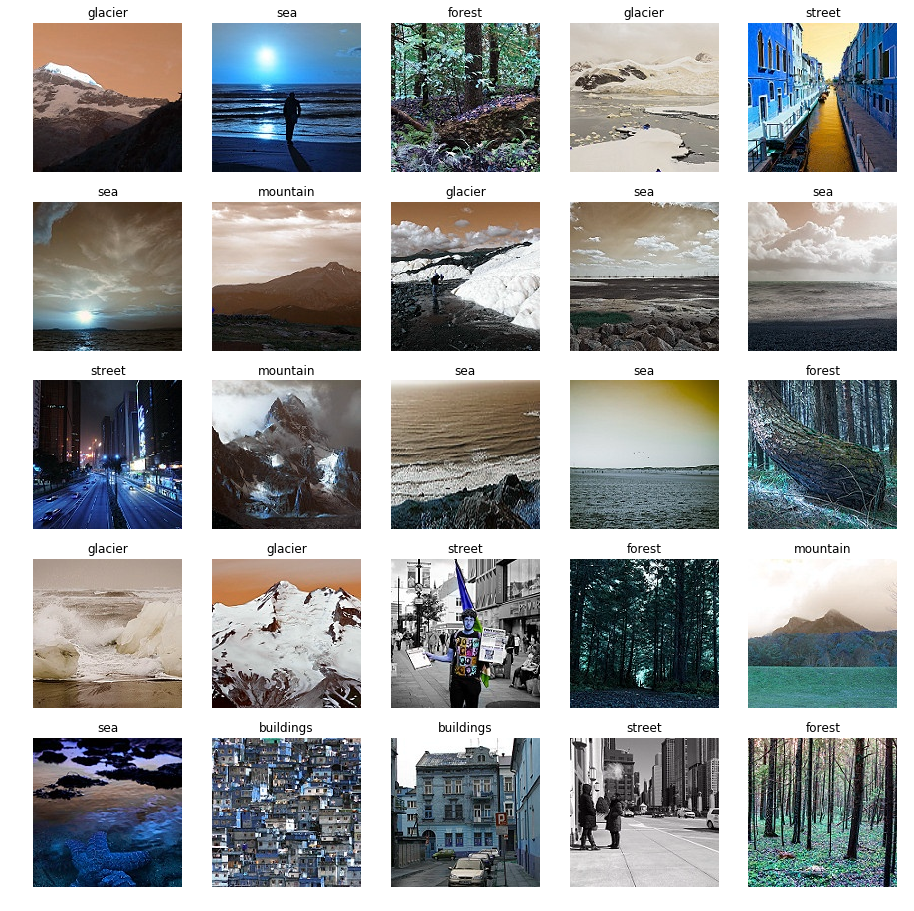

In [16]:
def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    return labels[class_code]


f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,2,3)
for i in range(0,5):
    for j in range(0,5):
        rnd_number = randint(0,len(Images))  # Take any random image from all the images
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [18]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 21, 21, 50)       

In [0]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model,to_file='model.png',show_shapes=True)

#Now, lets train the model with validation split equal to 30% from training data. Validation split is used to determine that our model is not geting over-fitted.

In [20]:

trained = model.fit(Images,
                    Labels,
                    epochs=35,
                    validation_split=0.30)

Train on 9823 samples, validate on 4211 samples
Epoch 1/35
9823/9823 [==============================] - 197s 20ms/sample - loss: 1.4843 - acc: 0.3879 - val_loss: 1.0857 - val_acc: 0.5664
Epoch 2/35
9823/9823 [==============================] - 186s 19ms/sample - loss: 1.1833 - acc: 0.5271 - val_loss: 0.9339 - val_acc: 0.6540
Epoch 3/35
9823/9823 [==============================] - 186s 19ms/sample - loss: 1.0157 - acc: 0.6106 - val_loss: 0.8456 - val_acc: 0.6792
Epoch 4/35
9823/9823 [==============================] - 186s 19ms/sample - loss: 0.9195 - acc: 0.6635 - val_loss: 0.6841 - val_acc: 0.7509
Epoch 5/35
9823/9823 [==============================] - 186s 19ms/sample - loss: 0.8358 - acc: 0.6989 - val_loss: 0.6744 - val_acc: 0.7492
Epoch 6/35
9823/9823 [==============================] - 186s 19ms/sample - loss: 0.7349 - acc: 0.7462 - val_loss: 0.6765 - val_acc: 0.7597
Epoch 7/35
9823/9823 [==============================] - 186s 19ms/sample - loss: 0.6773 - acc: 0.7677 - val_loss: 0.62

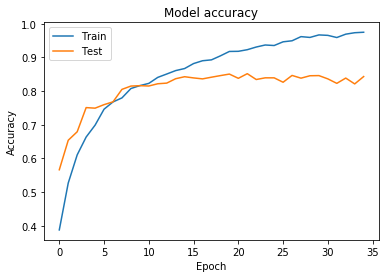

In [21]:
plot.plot(trained.history['acc'])
plot.plot(trained.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()



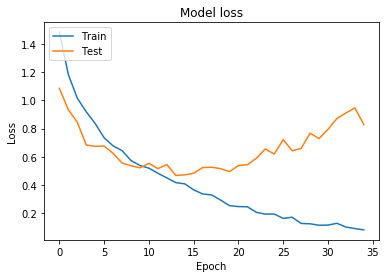

In [22]:
plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

#Import Test Images

In [0]:
!unzip seg_test.zip

In [25]:
test_images,test_labels = get_images('/content/seg_test/')
print(len(test_images))
print(len(test_labels))
test_images = np.array(test_images)
test_labels = np.array(test_labels)

3000
3000


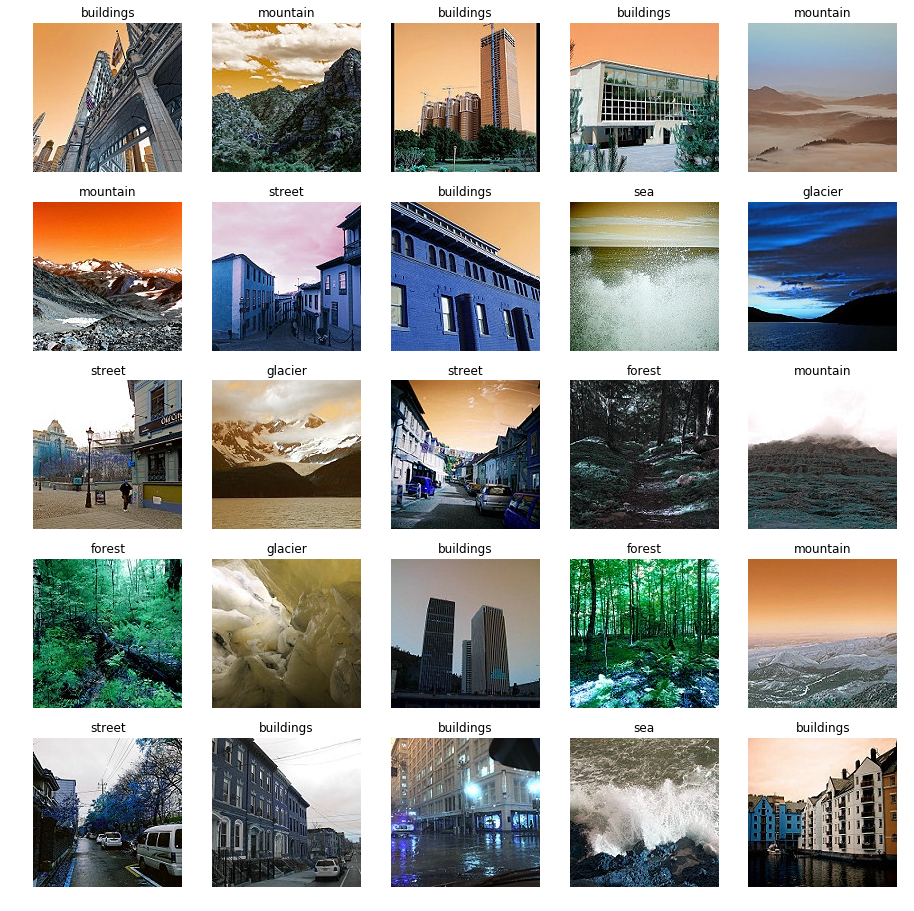

In [27]:
def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    return labels[class_code]


f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,2,3)
for i in range(0,5):
    for j in range(0,5):
        rnd_number = randint(0,len(test_images))  # Take any random image from all the images
        ax[i,j].imshow(test_images[rnd_number])
        ax[i,j].set_title(get_classlabel(test_labels[rnd_number]))
        ax[i,j].axis('off')

In [26]:
#check the accuracy of testing  data
model.evaluate(test_images,test_labels, verbose=1)

3000/3000 [==============================] - 17s 6ms/sample - loss: 0.8183 - acc: 0.8453


[0.8183419461846352, 0.84533334]

#Now it's time to predict the image classes

In [0]:
!unzip seg_pred.zip

['9227.jpg', '23356.jpg', '12475.jpg', '9826.jpg', '22749.jpg', '22641.jpg', '12625.jpg', '22968.jpg', '9803.jpg', '8085.jpg']
(150, 150, 3)


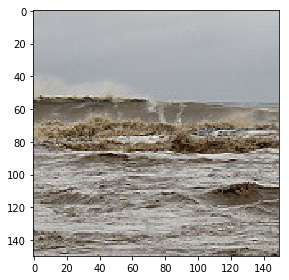

In [41]:
#Read original image
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
%matplotlib inline
path = os.listdir("/content/seg_pred/")
print(path[:10])
image_org = imread("/content/seg_pred/" + path[0])
print(image_org.shape)  # (pixels along the vertical line , pixels along the horizontal lines)
# print(image_org)
imshow(image_org)

In [64]:
def get_pred_images(directory):
    direc = os.listdir(directory)
    print(direc)
    if('seg_pred' in direc):
      Images = []
      Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
      label = 0

      for image_file in os.listdir(directory+'seg_pred'+'/'): #Main Directory where each class label is present as folder name.
#         print(image_file)
        image = cv2.imread(directory+'seg_pred'+'/' + image_file) #Reading the image (OpenCV)
        image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
        Images.append(image)
    return shuffle(Images,random_state=817328462) #Shuffle the dataset you just prepared.

    
pred_images = get_pred_images('/content/')
print(np.array(pred_images).shape)
print(len(pred_images))
pred_images = np.array(pred_images)

['.config', 'kaggle.json', 'seg_test', 'intel-image-classification.zip', 'seg_pred', 'seg_train', 'seg_pred.zip', 'seg_train.zip', 'seg_test.zip', 'sample_data']
(7301, 150, 150, 3)
7301


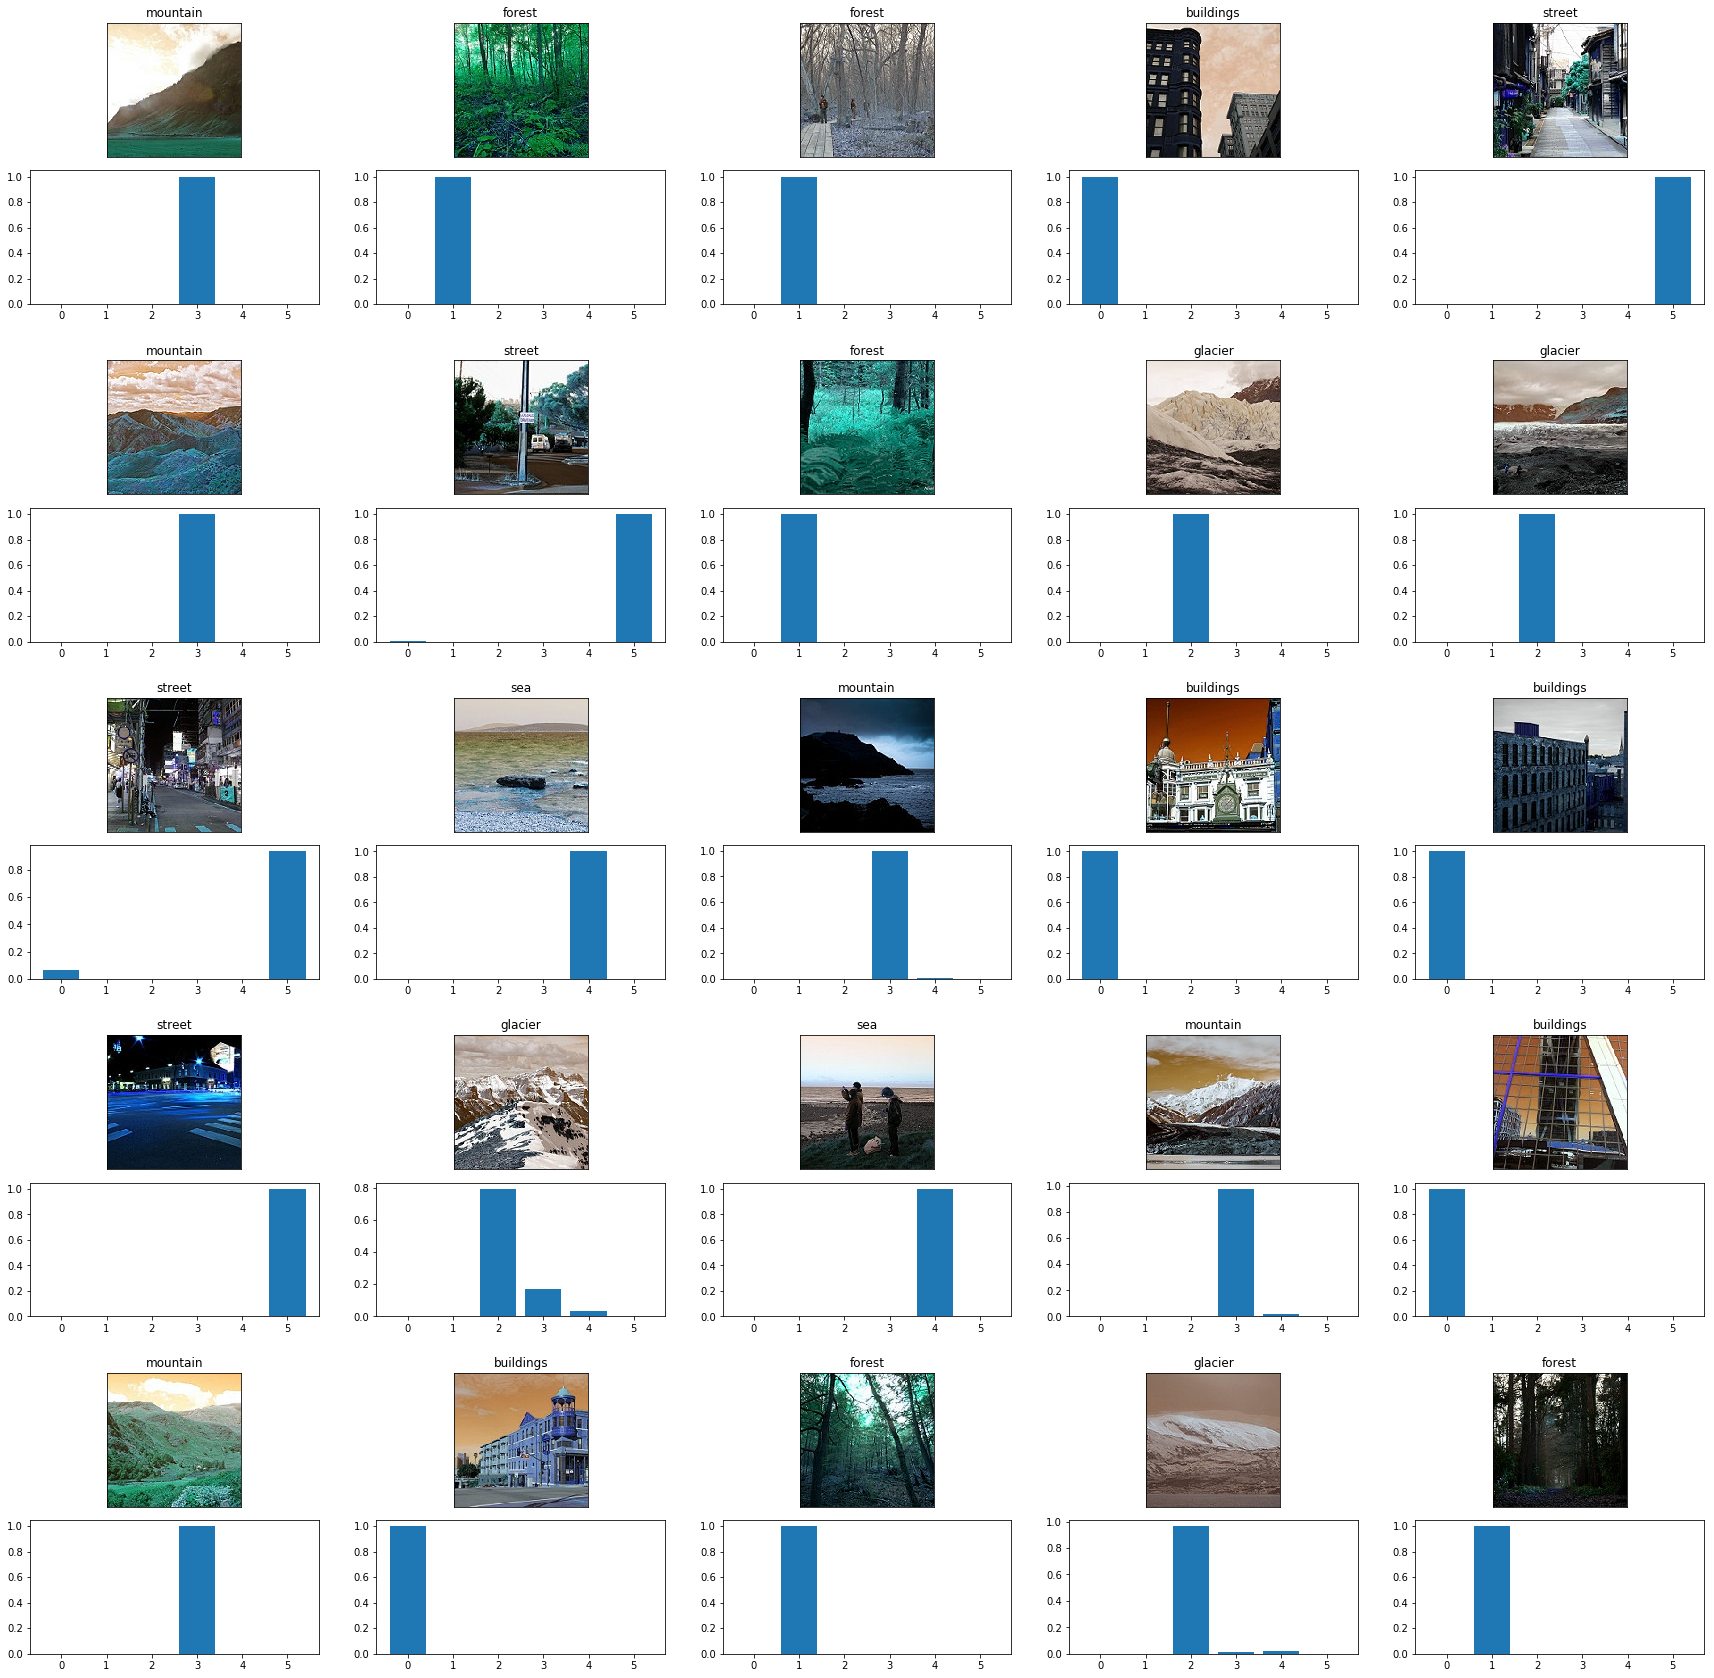

In [66]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_classlabel(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


fig.show()

#Use of Shuffle() function

In [0]:
from sklearn.utils import shuffle
k = [1,2,3,4,5,6,7,8,9,10,11,12,13]
shuffle(k,random_state=817328462)

[6, 9, 7, 4, 12, 13, 8, 1, 10, 11, 3, 2, 5]